# **ECOMMERCE DATA ANALYSIS**

# **INTRODUCTION**


In the age of digital commerce, understanding customer behavior and market trends is paramount for businesses to thrive. This e-commerce data analysis project aims to delve into the wealth of data generated by online transactions to uncover valuable insights that can drive strategic decision-making.

Through this project, I aim to empower businesses with actionable insights that will enable them to stay competitive in today's dynamic e-commerce landscape.

# **OBJECTIVES**

The objective of this e-commerce data analysis project is to extract actionable insights from the wealth of data generated by online transactions. By analyzing customer behavior, market trends, and product performance, we aim to identify opportunities for optimization, improve decision-making, and ultimately drive revenue growth for the e-commerce business.

Here are some potential analyses we are going to perform:**CUSTOMER ANALYSIS**
**PRODUCT ANALYSIS**
**ORDER ANALYSIS**
**SALES ANALYSIS**
**CUSTOMER ORDER PATTERNS**
**TIME-BASED ANALYSIS**
**GEOGRAPHICAL ANALYSIS**
**PRODUCT PERFORMANCE**
**CUSTOMER RETENTION**
**PAYMENT ANALYSIS**

# **STEPS TO BE PERFORMED**

# PACKAGES IMPORT

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

# DATASET CONNECTIVITY

To perform the analysis, we'll establish a connection to the MySQL database containing 
the ecommerce data. We'll use the appropriate Python libraries, such as pandas an 
mysql, to fetch and manipulate the data directly from the database.

In [102]:
import mysql.connector
import pandas as pd

connection = mysql.connector.connect(
user='root',
password='mysqlShreosi@123',
host='localhost',
database='ecommerce_db'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

#printing first 5 records from each table
print("Customer Data:")
print(customer_data.head())
print("\nProduct Data:")
print(product_data.head())
print("\nOrder Data:")
print(order_data.head())

Customer Data:
  customer_id             name         city                        email  \
0        C001         John Doe     New York         john.doe@example.com   
1        C002       Jane Smith  Los Angeles       jane.smith@example.com   
2        C003  Michael Johnson      Chicago  michael.johnson@example.com   
3        C004   Emily Williams      Houston   emily.williams@example.com   
4        C005      David Brown      Phoenix      david.brown@example.com   

       phone_no       address  pin_code  
0  123-456-7890   123 Main St     10001  
1  987-654-3210    456 Elm St     90001  
2  456-789-0123    789 Oak St     60601  
3  321-654-0987  101 Maple St     77002  
4  789-012-3456   234 Pine St     85001  

Product Data:
  product_id           product_name     category sub_category  original_price  \
0       P001         Super Sofa Set    Furniture     Sofa Set           29999   
1       P002               Cozy Bed    Furniture          Bed           39999   
2       P003  Eleg

# INFORMATION ABOUT THE DATASET

In [132]:
# Create DataFrame objects
customer_df = pd.DataFrame(customer_data)
product_df = pd.DataFrame(product_data)
order_df = pd.DataFrame(order_data)

# Print Customer Data
print("Customer Data:")
print(customer_df.info())

# Print Product Data
print("\nProduct Data:")
print(product_df.info())

# Print Order Data
print("\nOrder Data:")
print(order_df.info())

Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  30 non-null     object
 1   name         30 non-null     object
 2   city         30 non-null     object
 3   email        30 non-null     object
 4   phone_no     30 non-null     object
 5   address      30 non-null     object
 6   pin_code     30 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ KB
None

Product Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      50 non-null     object
 1   product_name    50 non-null     object
 2   category        50 non-null     object
 3   sub_category    50 non-null     object
 4   original_price  50 non-null     int64 
 5   selling_price   50 non-null  

# SUMMARY STATISTICS OF NUMERICAL FEATURES:

In [105]:
# Define a list of DataFrames
data_frames = [customer_df, product_df, order_df]

# Iterate through each DataFrame and display summary statistics of numerical features
for i, df in enumerate(data_frames):
    print(f"Summary Statistics of Numerical Features for DataFrame {i+1}:")
    print(df.describe())
    print()

Summary Statistics of Numerical Features for DataFrame 1:
           pin_code
count     30.000000
mean   60181.933333
std    29652.203179
min     2101.000000
25%    37426.500000
50%    74151.500000
75%    83801.250000
max    98101.000000

Summary Statistics of Numerical Features for DataFrame 2:
       original_price  selling_price       stock
count       50.000000      50.000000   50.000000
mean     34381.800000   37274.000000  132.500000
std      32309.802395   34258.369155   72.886899
min         59.000000      80.000000   10.000000
25%       1899.000000    2125.000000   71.250000
50%      24499.000000   27500.000000  132.500000
75%      58749.000000   63750.000000  193.750000
max     114999.000000  120000.000000  255.000000

Summary Statistics of Numerical Features for DataFrame 3:
        quantity    total_price
count  50.000000      50.000000
mean    1.740000   57530.720000
std     0.828325   78572.419478
min     1.000000     158.000000
25%     1.000000    2923.500000
50%     1.5

# DATA CLEANING & PRESENTATION

In [109]:
# Check for missing values
print("Missing values in Customer Data:")
print(customer_df.isnull().sum())

print("\nMissing values in Product Data:")
print(product_df.isnull().sum())

print("\nMissing values in Order Data:")
print(order_df.isnull().sum())

# Remove duplicates
customer_df = customer_df.drop_duplicates()
product_df = product_df.drop_duplicates()
order_df = order_df.drop_duplicates()

# Address inconsistencies
customer_df['customer_name'] = customer_df['name'].str.title()  # Capitalize names
product_df['product_name'] = product_df['product_name'].str.title()  # Capitalize product names

# Convert date strings to datetime objects
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Display cleaned datasets
print("\nCleaned Customer Data:")
print(customer_df.head())

print("\nCleaned Product Data:")
print(product_df.head())

print("\nCleaned Order Data:")
print(order_df.head())



Missing values in Customer Data:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Missing values in Product Data:
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Missing values in Order Data:
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

Cleaned Customer Data:
  customer_id             name         city                        email  \
0        C001         John Doe     New York         john.doe@example.com   
1        C002       Jane Smith  Los Angeles       jane.smith@example.com   
2        C003  Michael Johnson      Chicago  michael.johnson@example.com   
3        C004   Emily Williams      Houston   emily.williams@example.com   
4        C005      David Brown      Phoenix      david.br

# EXPLORING INSIGHTS THROUGH DATA VISUALIZATION IN THE E-COMMERCE PROJECT

# **CUSTOMER ANALYSIS**

## **1.City-wise Distribution of Customers:**

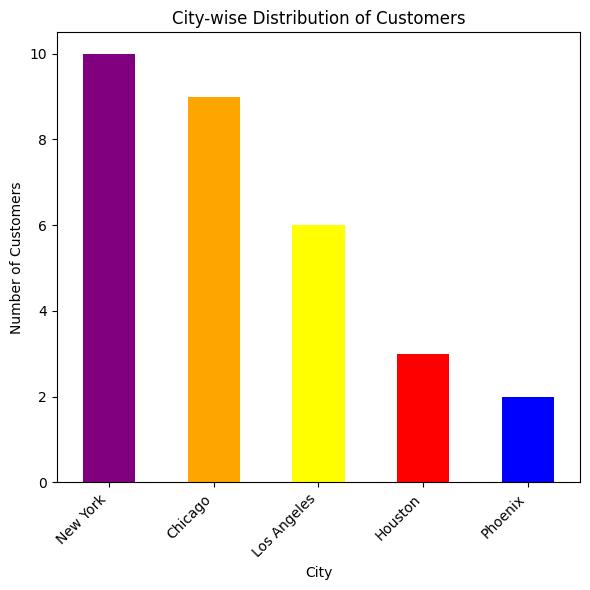

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

customer_city_counts = customer_df['city'].value_counts()
plt.figure(figsize=(6, 6))
customer_city_counts.plot(kind='bar', color=['purple','orange','yellow','red','blue'])
plt.title('City-wise Distribution of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Identify the most frequent customers based on their order history.**

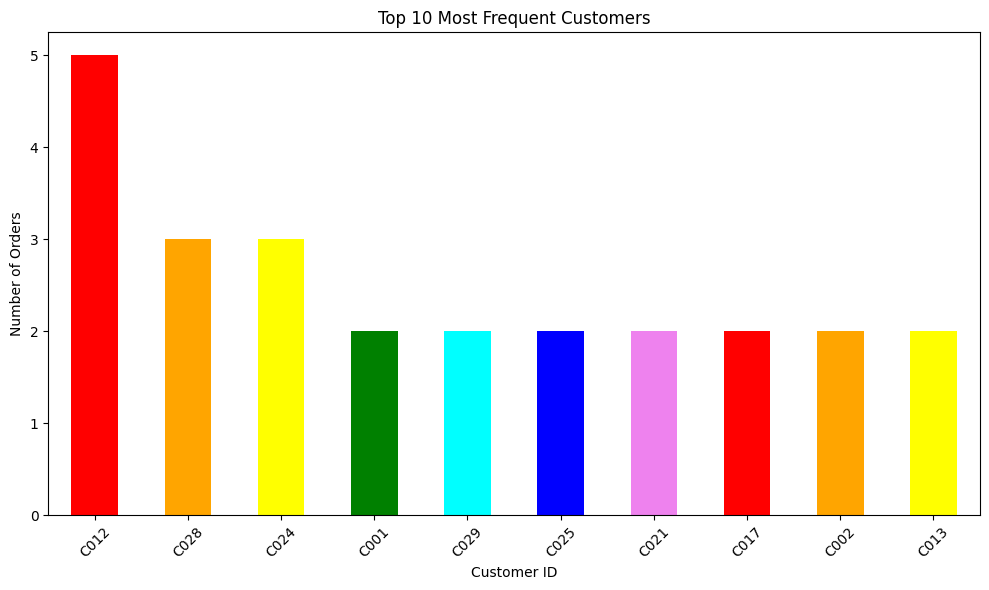

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with customer_df to get customer information for each order
order_customer_df = pd.merge(order_df, customer_df, on='customer_id')

# Count the number of orders for each customer
customer_order_counts = order_customer_df['customer_id'].value_counts()

# Get the top 10 most frequent customers
top_customers = customer_order_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color=['red','orange','yellow','green','cyan','Blue','violet'])
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **PRODUCT ANALYSIS**

## **Determine the total number of products available by category:**

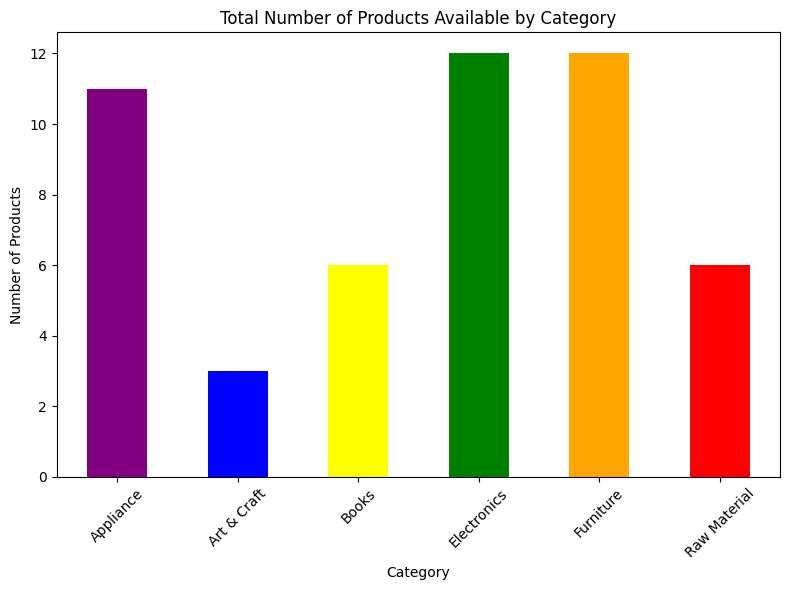

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge product_df with order_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Group by category and count the number of unique products in each category
products_by_category = order_product_df.groupby('category')['product_id'].nunique()

# Create a bar plot
plt.figure(figsize=(8, 6))
products_by_category.plot(kind='bar', color=['purple','blue','yellow','green','orange','red'])
plt.title('Total Number of Products Available by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Analyze the distribution of products across sub-categories.**

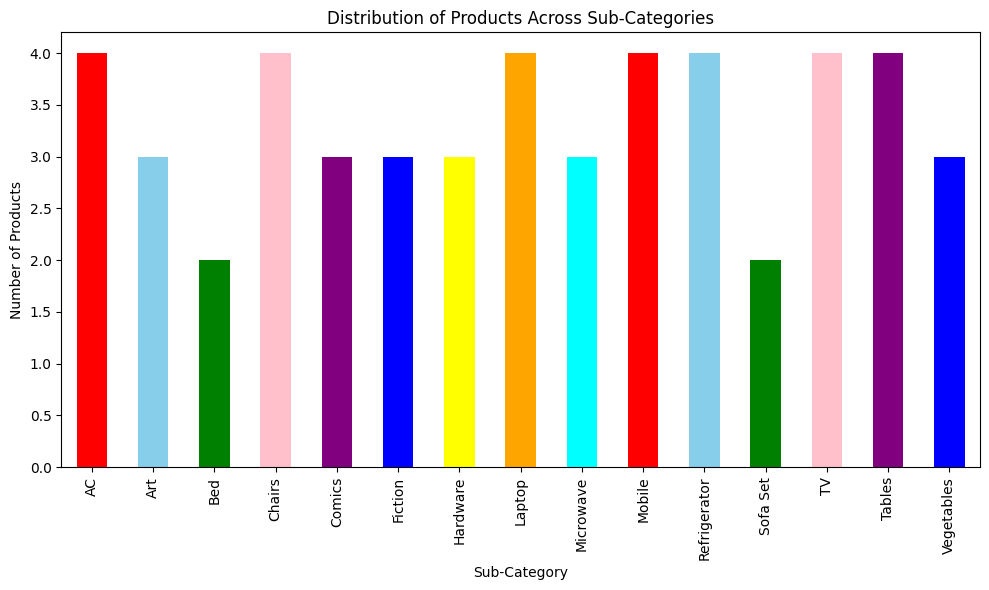

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge product_df with order_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Group by sub-category and count the number of unique products in each sub-category
products_by_subcategory = order_product_df.groupby('sub_category')['product_id'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
products_by_subcategory.plot(kind='bar', color=['red','skyblue','green','pink','purple','blue','yellow','orange','cyan'])
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## **Calculate the Average, Maximum, and Minimum Selling Prices for Pproduct:.**

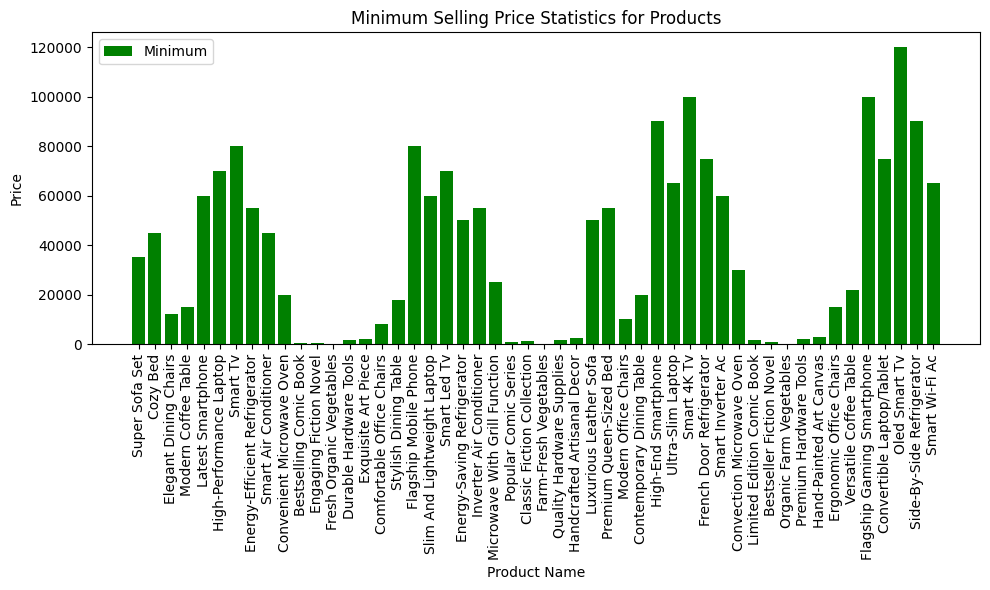

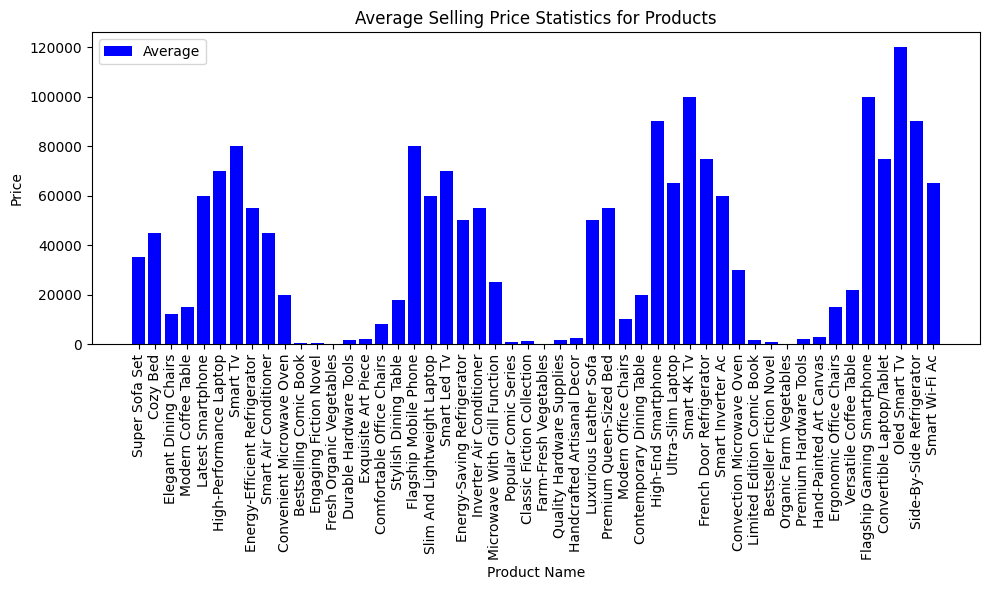

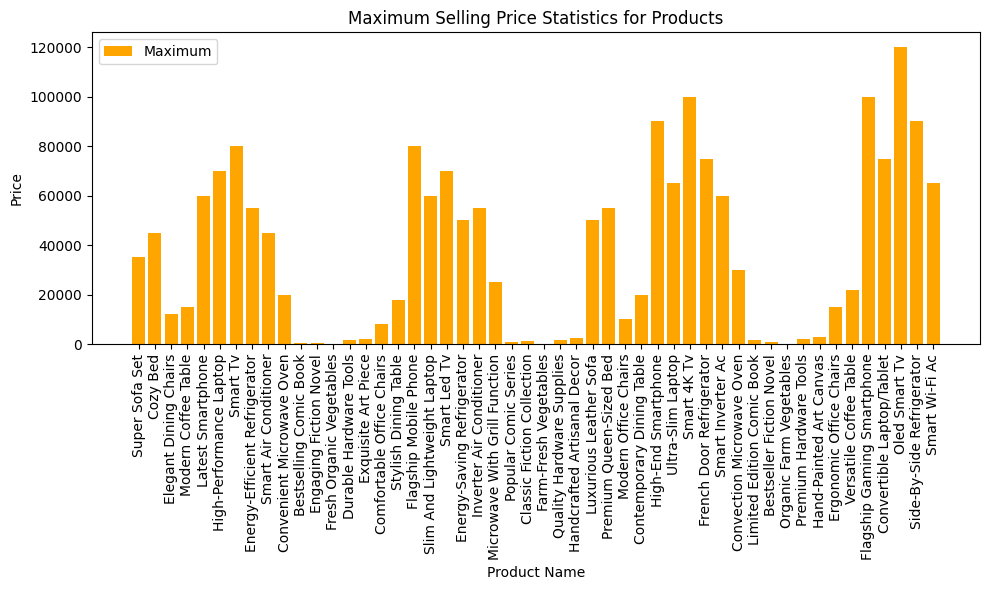

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Calculate selling price statistics
price_stats = order_product_df.groupby('product_id')['selling_price'].agg(['mean', 'max', 'min']).reset_index()

# Merge with product_df to get product information
price_stats = pd.merge(price_stats, product_df, on='product_id')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(price_stats['product_name'], price_stats['min'], color='green', label='Minimum')
plt.title('Minimum Selling Price Statistics for Products')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(price_stats['product_name'], price_stats['mean'], color='blue', label='Average')
plt.title('Average Selling Price Statistics for Products')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(price_stats['product_name'], price_stats['max'], color='orange', label='Maximum')
plt.title('Maximum Selling Price Statistics for Products')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


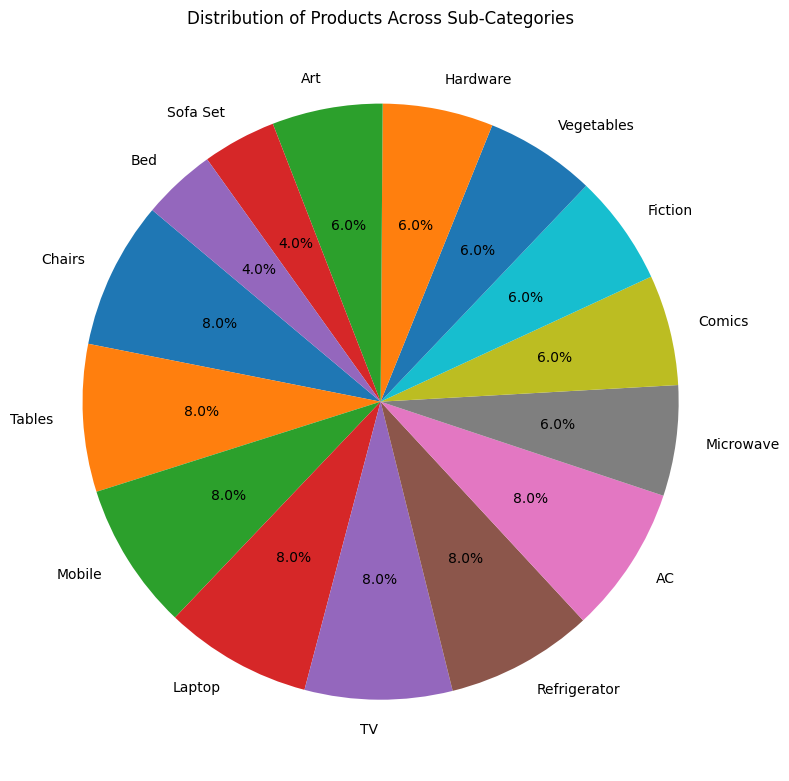

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information including sub-categories
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Group by sub-category and count the number of products in each sub-category
sub_category_distribution = order_product_df['sub_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_category_distribution, labels=sub_category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products Across Sub-Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# **ORDER ANALYSIS**

## **Calculate the top 10 orders product wise:**

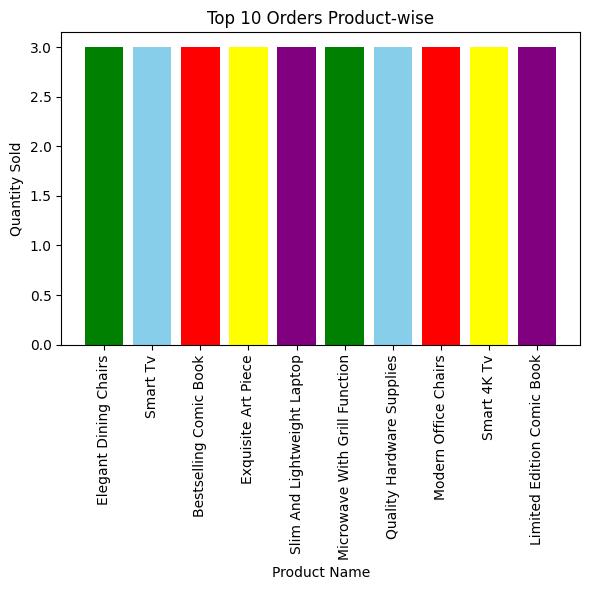

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Group by product and sum the quantity sold for each product
product_sold_quantity = order_product_df.groupby(['product_id', 'product_name'])['quantity'].sum().reset_index()

# Sort the products by quantity sold in descending order and select top 10
top_10_products = product_sold_quantity.nlargest(10, 'quantity')

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(top_10_products['product_name'], top_10_products['quantity'], color=['green','skyblue','red','yellow','purple'])
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## **Analyze the order status distribution:**

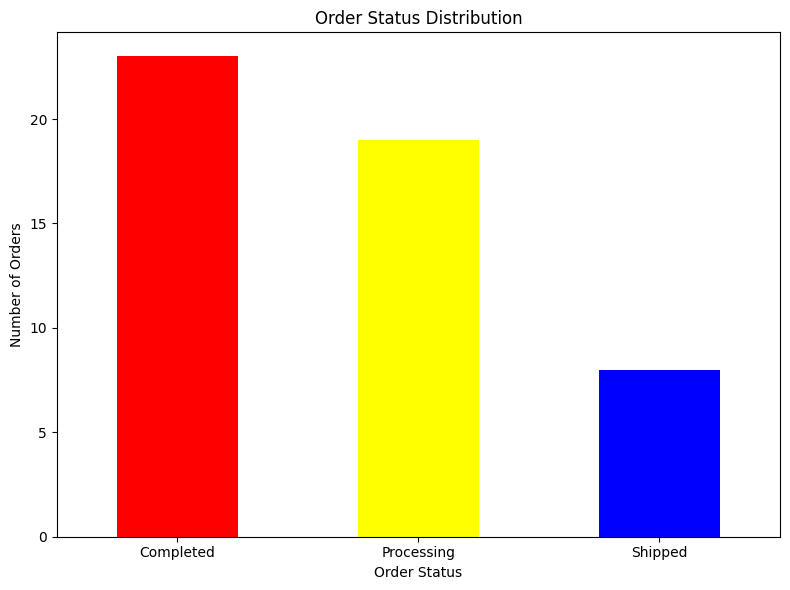

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by order status and count the number of orders for each status
order_status_distribution = order_df['order_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
order_status_distribution.plot(kind='bar', color=['red','yellow','blue'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


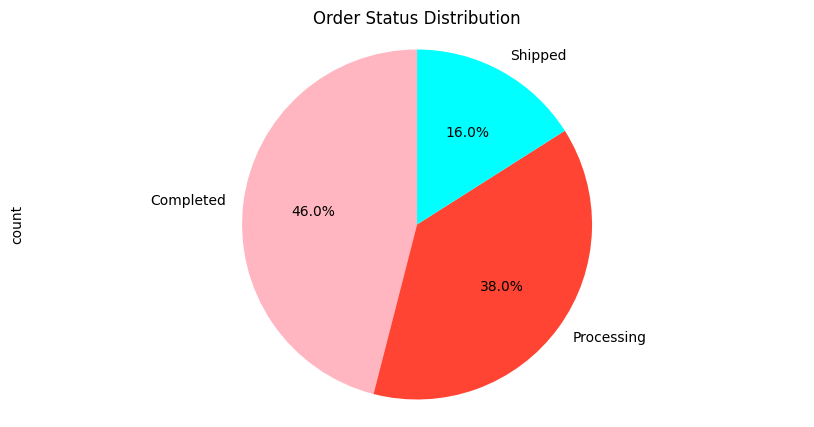

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

order_status_counts = order_df['order_status'].value_counts()
plt.figure(figsize=(10, 5))
order_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', '#FF4433', 'cyan'])
plt.title('Order Status Distribution')
plt.axis('equal')
plt.show()

# **SALES ANALYSIS**

## **Calculate the Total Revenue Generated from All Orders

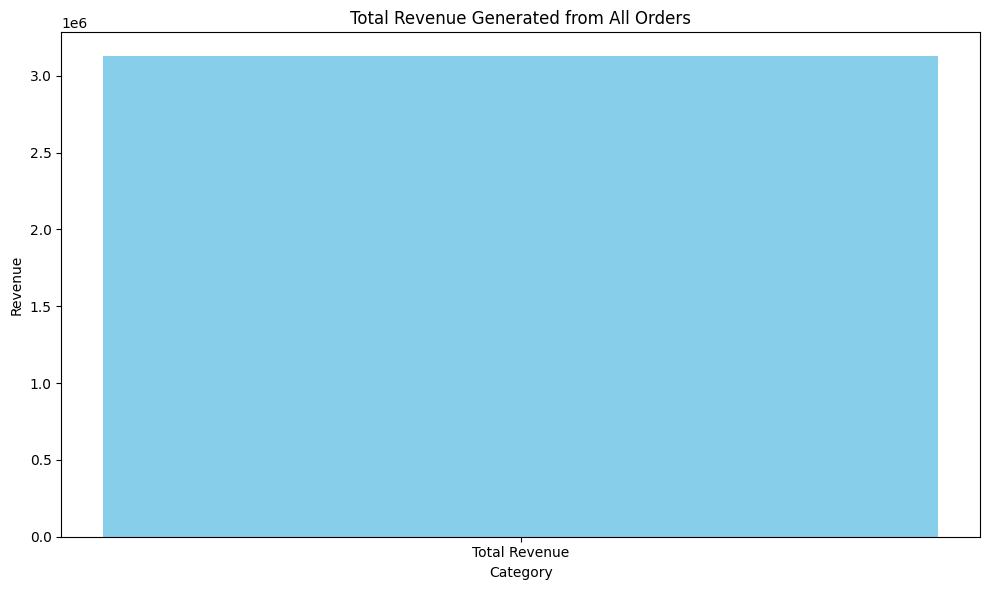

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Calculate total revenue generated from all orders
total_revenue = (order_product_df['quantity'] * order_product_df['selling_price']).sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


## **Identify the most profitable products based on the difference between original and selling prices:**

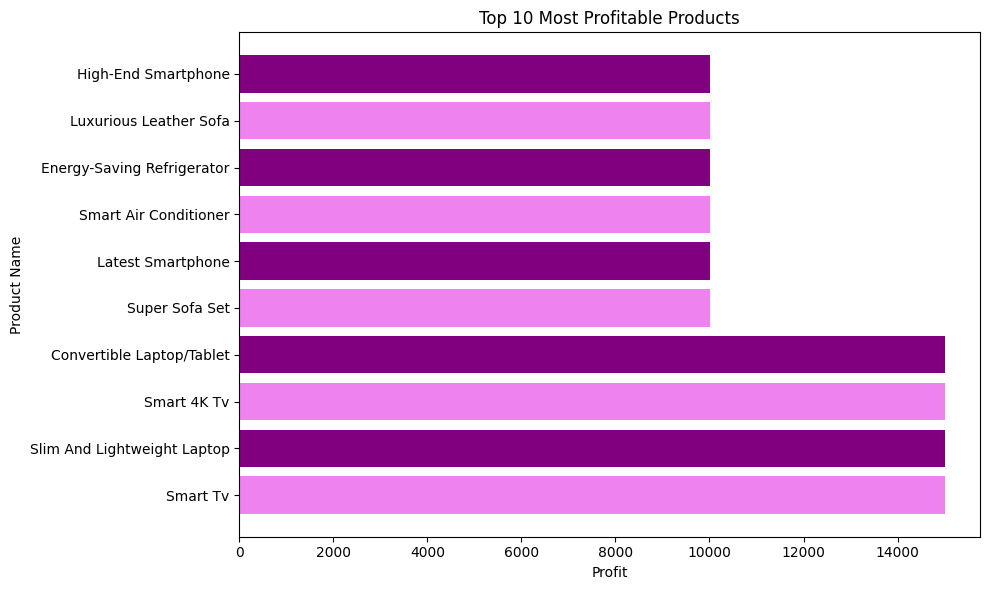

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Calculate the profit for each product
order_product_df['profit'] = (order_product_df['selling_price'] - order_product_df['original_price']) * order_product_df['quantity']

# Group by product and sum the profit for each product
product_profit = order_product_df.groupby(['product_id', 'product_name'])['profit'].sum().reset_index()

# Sort the products by profit in descending order
most_profitable_products = product_profit.nlargest(10, 'profit')

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(most_profitable_products['product_name'], most_profitable_products['profit'], color=['violet','purple'])
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# **CUSTOMER ORDER PATTERNS**

## **Identify product names with the highest and lowest order quantities:**

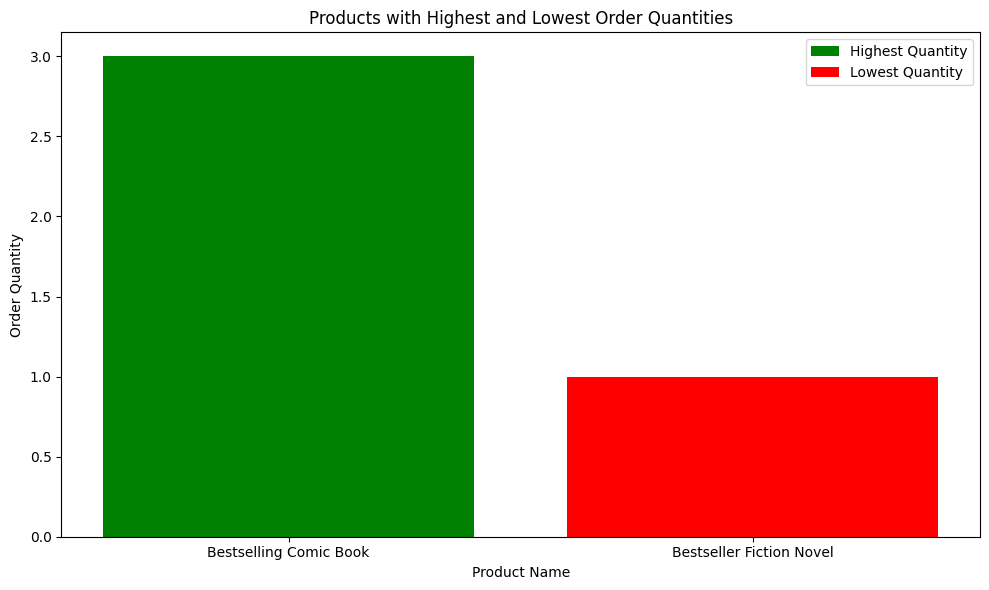

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order_df with product_df to get product information for each order
order_product_df = pd.merge(order_df, product_df, on='product_id')

# Group by product name and calculate the total quantity sold for each product
product_quantity = order_product_df.groupby('product_name')['quantity'].sum().reset_index()

# Find the product with the highest order quantity
highest_quantity_product = product_quantity.nlargest(1, 'quantity')

# Find the product with the lowest order quantity
lowest_quantity_product = product_quantity.nsmallest(1, 'quantity')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(highest_quantity_product['product_name'], highest_quantity_product['quantity'], color='green', label='Highest Quantity')
plt.bar(lowest_quantity_product['product_name'], lowest_quantity_product['quantity'], color='red', label='Lowest Quantity')
plt.title('Products with Highest and Lowest Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## **Determine the most preferred payment modes:**

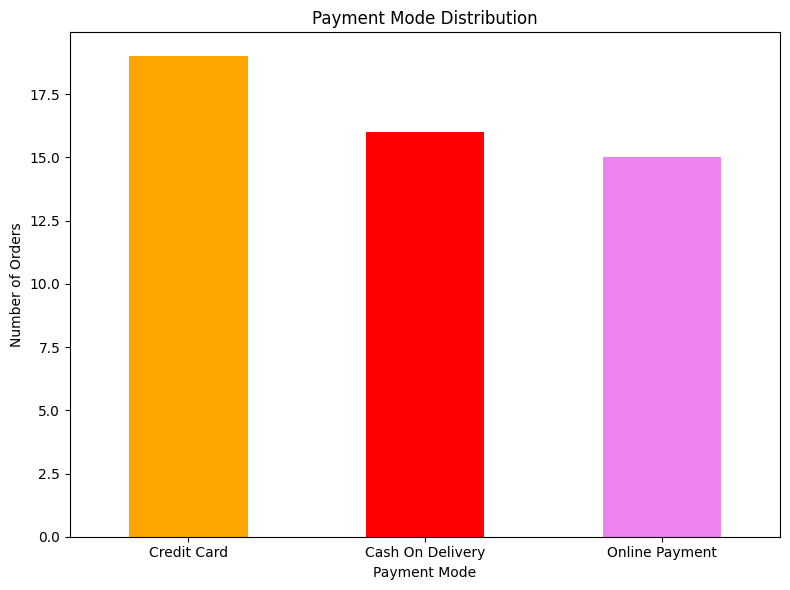

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by payment mode and count the number of orders for each mode
payment_mode_distribution = order_df['payment_mode'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
payment_mode_distribution.plot(kind='bar', color=['Orange','Red', 'violet'])
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# **CONCLUSION**

In conclusion, the analysis of e-commerce data has provided valuable insights into customer behavior, product performance, and sales trends. By leveraging data analytics techniques, we have identified opportunities for optimization and strategic decision-making.

Key findings include the identification of top-selling products, popular payment modes, and trends in order status distribution. Additionally, we uncovered the most profitable products and analyzed the distribution of products across categories and sub-categories.

Overall, this analysis equips businesses with actionable insights to enhance customer experience, optimize operations, and drive revenue growth in the competitive e-commerce landscape.

# **ACKNOWLEDGEMENT**

I would like to express my gratitude to Anudip Foundation who have given me the scope to do this project. Additionally, a special thanks to my mentor Suramya Biswas Sir for his valuable guidance and support throughout the project.

Last but not least, I am thankful to the broader community of data scientists, researchers, and practitioners whose work and publications served as a source of inspiration and reference.

This project would not have been possible without the collective effort and collaboration of all involved parties. Thank you for your contributions and dedication.

# **THANK YOU**